In [11]:
# Music player in python
from pygame import mixer
mixer.init()
# --------------------------Path of your music
mixer.music.load("../DataBase/108.wav")
mixer.music.set_volume(0.5)
mixer.music.play()

while True:
    print("PAUSE 'p' RESUME 'r' SET VOL 'v' EXIT 'e'")
    ch = input("['p','r','v','e']>>>")
    if ch == "p":
        mixer.music.pause()
    elif ch == "r":
        mixer.music.unpause()
    elif ch == "v":
        v = float(input("Enter volume(0 to 1): "))
        mixer.music.set_volume(v)
    elif ch == "e":
        mixer.music.stop()
        break


PAUSE 'p' RESUME 'r' SET VOL 'v' EXIT 'e'


[0. 0. 0. ... 0. 0. 0.]
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.0156380e-05
 -8.5245056e-06 -4.2583528e-05]
Duration 1 = 32.522448979591836s
Duration 2 = 17.03183673469388s
Sr 1 = 22050
Sr 2 = 22050


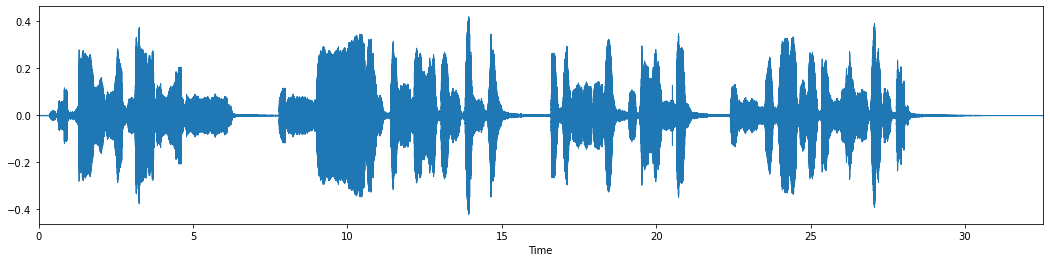

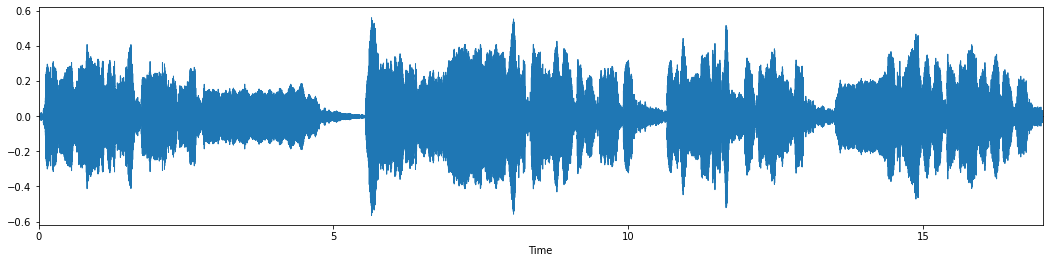

In [13]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

wav_fname1 = "../DataBase/108.wav"
wav_fname2 = "../DataBase/109.wav"

data1,sr1=librosa.load(wav_fname1)
data2,sr2=librosa.load(wav_fname2)

plt.figure(figsize=(18,4))
librosa.display.waveplot(data1,sr1)

plt.figure(figsize=(18,4))
librosa.display.waveplot(data2,sr2)

print(data1) # (n samples , 0)
print(data2) # (n samples , 0)
length1 = data1.shape[0] / sr1
length2 = data2.shape[0] / sr2
print(f"Duration 1 = {length1}s")
print(f"Duration 2 = {length2}s")
print(f"Sr 1 = {sr1}")
print(f"Sr 2 = {sr2}")
# from sklearn import preprocessing
# preprocessing.normalize([data])
# plt.figure(figsize=(18,4))
# librosa.display.waveplot(data,sr)


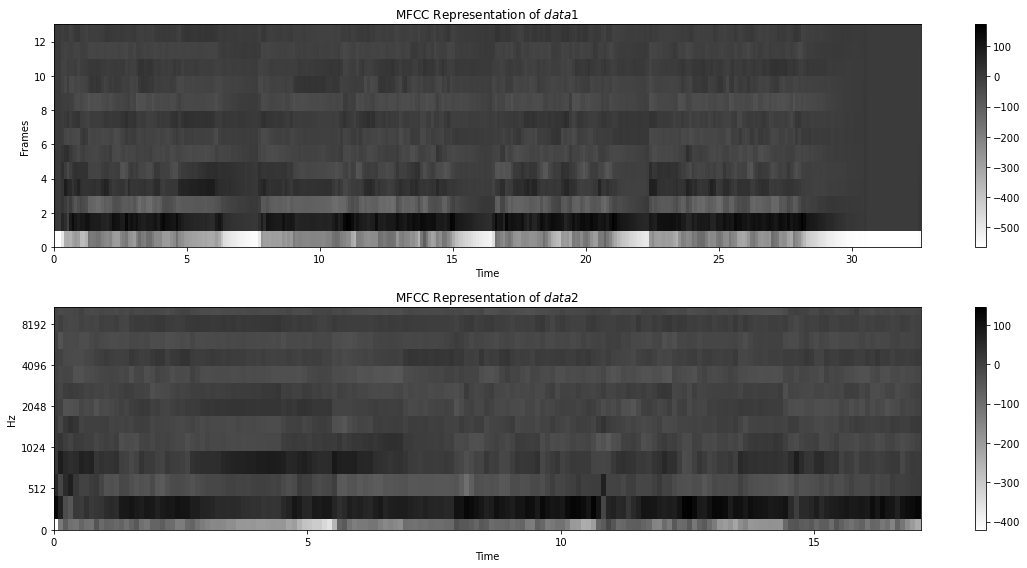

In [14]:
n_fft = 4410
hop_size = 2205
mfcc1 = librosa.feature.mfcc(y=data1, sr=sr1, n_mfcc=13, norm="ortho",hop_length=hop_size, n_fft=n_fft)
mfcc2 = librosa.feature.mfcc(y=data2, sr=sr2, n_mfcc=13, norm="ortho",hop_length=hop_size, n_fft=n_fft)

plt.figure(figsize=(16, 8))
plt.subplot(2, 1, 1)
plt.title('MFCC Representation of $data1$')
librosa.display.specshow(mfcc1, x_axis='time',y_axis='frames', cmap='gray_r', hop_length=hop_size)
plt.colorbar()
plt.subplot(2, 1, 2)
plt.title('MFCC Representation of $data2$')
librosa.display.specshow(mfcc2, x_axis='time',y_axis='mel', cmap='gray_r', hop_length=hop_size)
plt.colorbar()
plt.tight_layout()

D = [[3.85058326e-02 3.03808554e-01 7.51266116e-01 ... 4.99984008e+01
  5.01394020e+01 5.02592437e+01]
 [8.54252439e-02 3.17213066e-01 7.59678381e-01 ... 5.00060231e+01
  5.01493211e+01 5.02702059e+01]
 [1.33285527e-01 3.65710661e-01 7.74216201e-01 ... 5.00127183e+01
  5.01581029e+01 5.02813105e+01]
 ...
 [4.63956759e+01 4.66279726e+01 4.70340575e+01 ... 3.65966828e+01
  3.52421038e+01 3.45303524e+01]
 [4.64466710e+01 4.66789677e+01 4.70850526e+01 ... 3.67898443e+01
  3.53975680e+01 3.46665094e+01]
 [4.64862984e+01 4.67096042e+01 4.71214771e+01 ... 3.69678278e+01
  3.55374972e+01 3.47876913e+01]]
wp = [[325 170]
 [324 170]
 [323 170]
 [322 170]
 [321 170]
 [320 170]
 [319 170]
 [318 170]
 [317 170]
 [316 170]
 [315 170]
 [314 170]
 [313 170]
 [312 170]
 [311 170]
 [310 170]
 [309 170]
 [308 170]
 [307 170]
 [306 170]
 [305 170]
 [304 170]
 [303 170]
 [302 170]
 [301 170]
 [300 170]
 [299 170]
 [298 170]
 [297 170]
 [296 170]
 [295 170]
 [294 170]
 [293 170]
 [292 170]
 [291 170]
 [290 

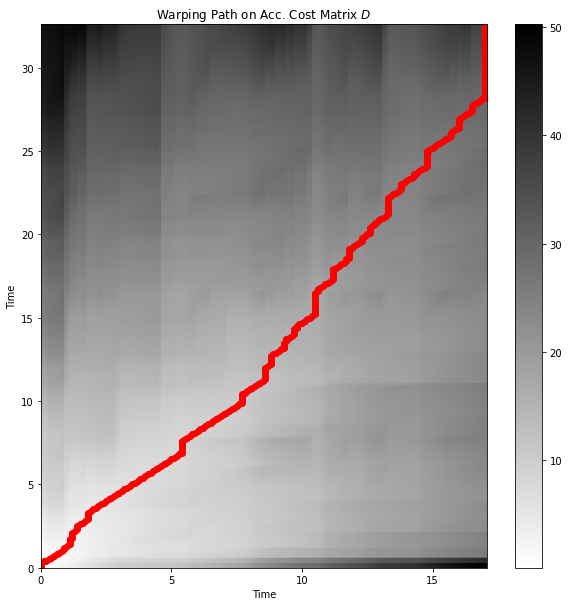

In [23]:
import librosa.sequence
import numpy as np
# scipy.spatial.distance.cdist(XA, XB, metric='euclidean', *, out=None, **kwargs) Compute distance between each pair of the two collections of inputs.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html
# metric : str Identifier for the cost-function as documented in scipy.spatial.distance.cdist()
D, wp = librosa.sequence.dtw(X=mfcc1, Y=mfcc2, metric='cosine')
wp_s = np.asarray(wp) * hop_size / sr1
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
librosa.display.specshow(D, x_axis='time', y_axis='time',cmap='gray_r', hop_length=hop_size)
imax = ax.imshow(D, cmap=plt.get_cmap('gray_r'),origin='lower', interpolation='nearest', aspect='auto')
ax.plot(wp_s[:, 1], wp_s[:, 0], marker='o', color='r')
plt.title('Warping Path on Acc. Cost Matrix $D$')
plt.colorbar()
print(f"D = {D}")
print(f"wp = {wp}")

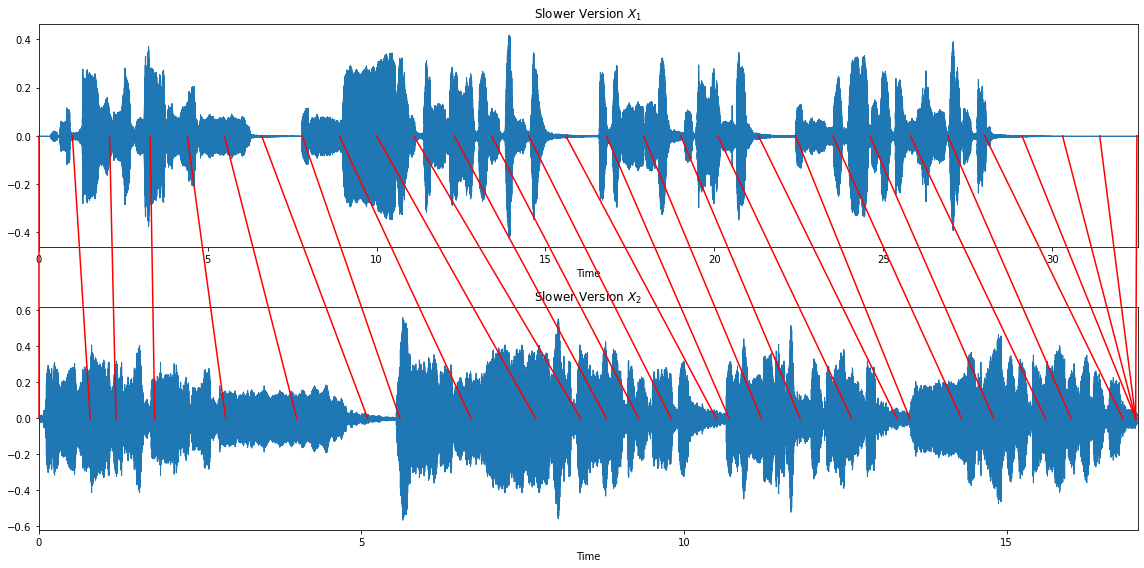

In [25]:
import matplotlib
fig = plt.figure(figsize=(16, 8))
# Plot x_1
plt.subplot(2, 1, 1)
librosa.display.waveplot(data1, sr=sr1)
plt.title('Slower Version $X_1$')
ax1 = plt.gca()

# Plot x_2
plt.subplot(2, 1, 2)
librosa.display.waveplot(data2, sr=sr2)
plt.title('Slower Version $X_2$')
ax2 = plt.gca()

plt.tight_layout()

trans_figure = fig.transFigure.inverted()
lines = []
arrows = 30
points_idx = np.int16(np.round(np.linspace(0, wp.shape[0] - 1, arrows)))

# for tp1, tp2 in zip((wp[points_idx, 0]) * hop_size, (wp[points_idx, 1]) * hop_size):
for tp1, tp2 in wp[points_idx] * hop_size / sr1:
    # get position on axis for a given index-pair
    coord1 = trans_figure.transform(ax1.transData.transform([tp1, 0]))
    coord2 = trans_figure.transform(ax2.transData.transform([tp2, 0]))

    # draw a line
    line = matplotlib.lines.Line2D((coord1[0], coord2[0]),
                                   (coord1[1], coord2[1]),
                                   transform=fig.transFigure,
                                   color='r')
    lines.append(line)

fig.lines = lines
plt.tight_layout()

In [ ]:
# import datetime as dt
# xs.append(dt.datetime.now().strftime('%H:%M:%S.%f'))
import numpy as np
print(np.array(data1))

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
import sys, os, os.path
from scipy.io import wavfile
import pandas as pd

# wav_fname = input("Input file number:")
# wav_fname = "../DataBase/108.wav"

# if wav_fname[-3:] != 'wav':
#     print('WARNING!! Input File format should be *.wav')
#     sys.exit()
# samrate, data = wavfile.read(str('./wavfile/' + wav_fname))
# print('Load is Done! \n')
wavData = pd.DataFrame(data)
if len(wavData.columns) == 2:
    print('Stereo .wav file\n')
    wavData.columns = ['R', 'L']
    stereo_R = pd.DataFrame(wavData['R'])
    stereo_L = pd.DataFrame(wavData['L'])
    print('Saving...\n')
    stereo_R.to_csv(str(wav_fname[:-4] + "_Output_stereo_R.csv"), mode='w')
    stereo_L.to_csv(str(wav_fname[:-4] + "_Output_stereo_L.csv"), mode='w')
    # wavData.to_csv("Output_stereo_RL.csv", mode='w')
    print('Save is done ' + str(wav_fname[:-4]) + '_Output_stereo_R.csv , '
                          + str(wav_fname[:-4]) + '_Output_stereo_L.csv')
elif len(wavData.columns) == 1:
    print('Mono .wav file\n')
    wavData.columns = ['M']
    wavData.to_csv(str(wav_fname[:-4] + "_Output_mono.csv"), mode='w')
    print('Save is done ' + str(wav_fname[:-4]) + '_Output_mono.csv')
else:
    print('Multi channel .wav file\n')
    print('number of channel : ' + len(wavData.columns) + '\n')
    wavData.to_csv(str(wav_fname[:-4] + "Output_multi_channel.csv"), mode='w')

    print('Save is done ' + str(wav_fname[:-4]) + 'Output_multi_channel.csv')

Mono .wav file

Save is done ../DataBase/بسم الله الرحمن الرحيم .. صوت (128  kbps) (shabakngy.com)_Output_mono.csv
